# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [25]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [30]:
df.rename({
    'GRADES_PK_G':'GRADES_PREK',
    'GRADES_KG_G':'GRADES_K',
    'GRADES_4_G':'GRADES_4',
    'GRADES_8_G':'GRADES_8',
    'GRADES_12_G':'GRADES_12',
    'GRADES_1_8_G':'GRADES_ELEMENTARY',
    'GRADES_9_12_G':'GRADES_HS',
    'GRADES_ALL_G':'GRADES_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis = 1,inplace = True)
df.dropna(subset = ['AVG_MATH_4_SCORE'], inplace = True)
df_ = df.set_index("STATE")

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [9]:
len(pd.unique(df['YEAR']))

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [31]:
michigan = 0.0
for score in df[df["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"]:
    michigan += score
avg_michigan = michigan / len(df.groupby("YEAR"))

ohio = 0.0
for score in df[df["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"]:
    ohio += score
avg_ohio = ohio / len(df.groupby("YEAR"))

if avg_michigan > avg_ohio:
    print("MICHIGAN")
elif avg_michigan < avg_ohio:
    print("OHIO")
else:
    print("EQUAL")

OHIO


Find the average for your outcome score across all states in 2019

In [32]:
df_ = df.set_index("STATE")
df_2019 = df_[df_["YEAR"] == 2019]
df_2019.loc["NATIONAL"][["YEAR", "AVG_MATH_4_SCORE"]]

YEAR                 2019
AVG_MATH_4_SCORE    241.0
Name: NATIONAL, dtype: object

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [33]:
max = {}
df.head()
states = []
for i in range(len(df)):
    year = df.iloc[i]
    if year["STATE"] not in max:
        max[year["STATE"]] = year["AVG_MATH_4_SCORE"]
    else:
        if  year["AVG_MATH_4_SCORE"] > max[year["STATE"]]:
            max[year["STATE"]] = year["AVG_MATH_4_SCORE"]
sorted_max = sorted(max, key=lambda k:max[k], reverse = True)
for state in sorted_max:
    print(state, max[state])

MASSACHUSETTS 253.0
MINNESOTA 253.0
NEW_HAMPSHIRE 253.0
DODEA 250.0
INDIANA 249.0
NEW_JERSEY 249.0
KANSAS 248.0
VERMONT 248.0
VIRGINIA 248.0
WYOMING 248.0
COLORADO 247.0
MARYLAND 247.0
FLORIDA 246.0
IOWA 246.0
MAINE 246.0
NEBRASKA 246.0
NORTH_DAKOTA 246.0
OHIO 246.0
PENNSYLVANIA 246.0
WASHINGTON 246.0
CONNECTICUT 245.0
NORTH_CAROLINA 245.0
WISCONSIN 245.0
MONTANA 244.0
TEXAS 244.0
UTAH 244.0
DELAWARE 243.0
HAWAII 243.0
NEW_YORK 243.0
IDAHO 242.0
KENTUCKY 242.0
RHODE_ISLAND 242.0
SOUTH_DAKOTA 242.0
NATIONAL 242.0
MISSISSIPPI 241.0
MISSOURI 241.0
TENNESSEE 241.0
ARIZONA 240.0
ARKANSAS 240.0
GEORGIA 240.0
OKLAHOMA 240.0
OREGON 240.0
ILLINOIS 239.0
MICHIGAN 238.0
SOUTH_CAROLINA 238.0
ALASKA 237.0
NEVADA 237.0
WEST_VIRGINIA 237.0
CALIFORNIA 235.0
DISTRICT_OF_COLUMBIA 235.0
LOUISIANA 234.0
ALABAMA 233.0
NEW_MEXICO 233.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [35]:
df.dropna(subset = ['AVG_MATH_8_SCORE'], inplace = True)
df["MATH_DIFF"] = df["AVG_MATH_8_SCORE"] - df["AVG_MATH_4_SCORE"]
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12,GRADES_ELEMENTARY,GRADES_HS,GRADES_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,MATH_DEV,MATH_DIFF
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,39.0,39.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,46.0,46.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,42.0,42.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,37.0,37.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,40.0,40.0


Feature engineering justification: **<I made the changes I did because I thought it would be useful to how the math scores were affected over time, and to see how the quality of education had changed throughout the end of elementary school & middle school>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='AVG_MATH_8_SCORE', ylabel='AVG_MATH_4_SCORE'>

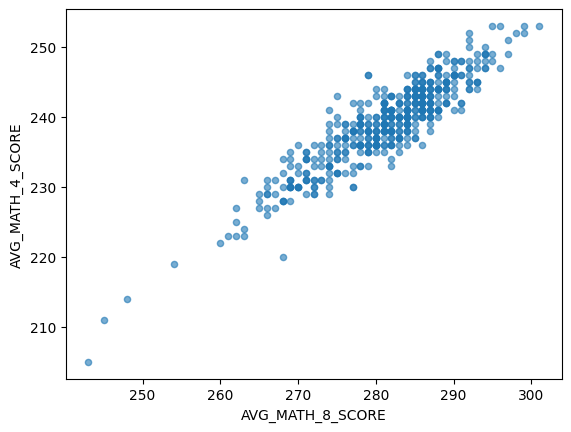

In [36]:
df.plot.scatter(x = 'AVG_MATH_8_SCORE', y = 'AVG_MATH_4_SCORE', alpha = 0.6)

**<CAPTION FOR VIZ 1>** There is a fairly strong positive correlation between the math scores of fourth grader's and 8th grader's. This shows that the education system is fairly consistent.

**Visualization 2**

<Axes: xlabel='AVG_READING_4_SCORE', ylabel='AVG_MATH_4_SCORE'>

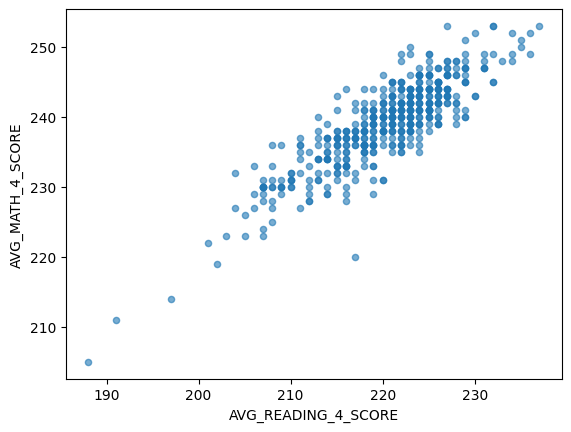

In [38]:
df.plot.scatter(x = 'AVG_READING_4_SCORE', y = 'AVG_MATH_4_SCORE', alpha = 0.6)

**<CAPTION FOR VIZ 2>** This shows a fairly strong positive correlation between reading scores and math scores in grade 4. This is interesting because one would think the data would be a little more scattered.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [39]:
from sklearn.model_selection import train_test_split

In [66]:
X = df[['GRADES_4', 'INSTRUCTION_EXPENDITURE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [43]:
y.fillna(y.median(), inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [44]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [45]:
# create your model here
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [52]:
model.score(X_test, y_test)

0.8538258796134043

In [53]:
np.mean(model.predict(X_test) - y_test)

0.007822692570428821

In [54]:
np.mean((model.predict(X_test) - y_test) **2) **0.5


2.395179131188591

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

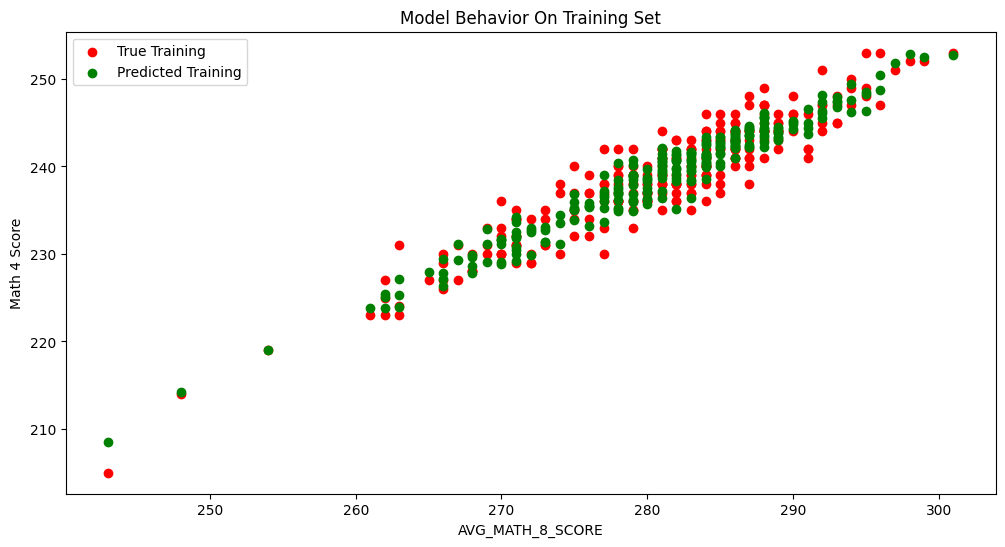

In [65]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

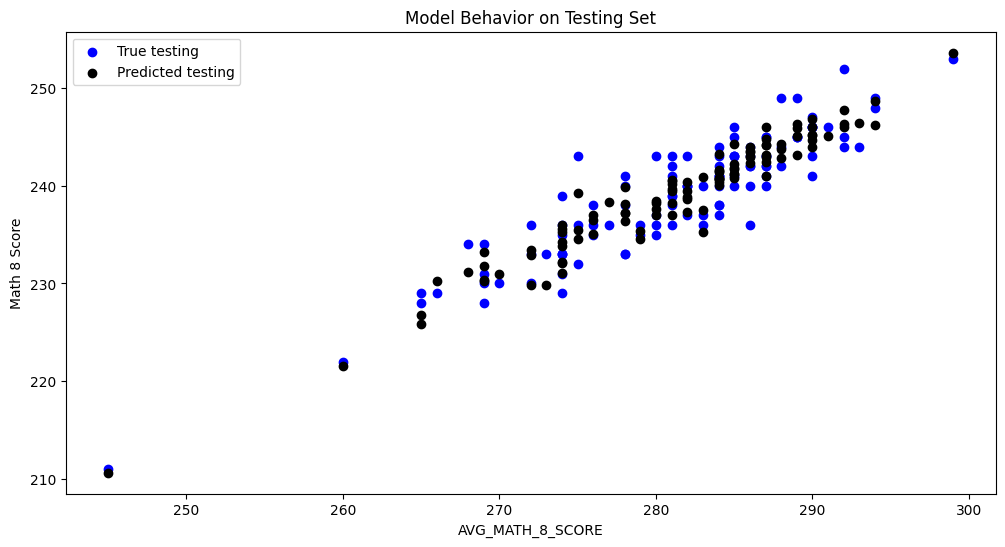

In [67]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

In Checkpoint 1, I investigated the average math scores of 4th graders. I found that Ohio's math scores were higher than Michigan's on average. I also found that the average math score for a fourth grader in the country was 241. I then made a new column in the data set that showed the growth in a student's math capabilities from 4th grade to 8th grade. I feel this is a very useful statistic because it shows the growth that a student has. 

For the Machine Learning portion of the checkpoint, I analyzed a similar question of the correlation between 4th grade to 8th grade and found interesting results. I got very encouraging data that showed a strong positive correlation, showing that the relationship between the scores of a 4th grader and the scores of an 8th grader can be very telling.